#### Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

#### Domain:

Banking

#### Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

#### Attribute Information:


 ID : Customer ID

 Age : Customer's age in completed years

 Experience : #years of professional experience

 Income : Annual income of the customer ($000)

 ZIP Code : Home Address ZIP code.

 Family : Family size of the customer

 CCAvg : Avg. spending on credit cards per month ($000)

 Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

 Mortgage : Value of house mortgage if any. ($000)

 Personal Loan : Did this customer accept the personal loan offered in the
last campaign?

 Securities Account : Does the customer have a securities account with the bank?

 CD Account : Does the customer have a certificate of deposit (CD)
account with the bank?

 Online : Does the customer use internet banking facilities?

 Credit card : Does the customer use a credit card issued by UniversalBank?



#### Learning Outcomes:
 Exploratory Data Analysis

 Preparing the data to train a model

 Training and making predictions using a classification model

 Model evaluation

#### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.


# Solution

### Step 1 - Import Libraries and read dataset

In [1]:
# Import necessary Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

In [2]:
#Import Machine Learning Modules
from sklearn.preprocessing import Imputer, LabelEncoder, OneHotEncoder, StandardScaler

In [3]:
#Read the Bank file in a dataframe
customer_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
#Print Columns, and Shape
print(customer_df.columns)
print('')
print(customer_df.shape)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

(5000, 14)


#### Observation:
File has 5000 rows and 14 Columns. 

In [5]:
#Print First three Records in dataset
customer_df.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


#### Observation:
1. ID and Zip Code is not needed for modelling, we will drop these colums
2. Age, Expereince, Income, Family, CCAvg and Mortgage are continuous Varibales
3. Personal Loan is dependent variable
4. Other variables are categorical. 

In [6]:
# Print Attribute info
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
#Convert applicable attributes to categorical variables
customer_df['ZIP Code'] = customer_df['ZIP Code'].astype('category')
customer_df['Education'] = customer_df['Education'].astype('category')
customer_df['Personal Loan'] = customer_df['Personal Loan'].astype('category')
customer_df['Securities Account'] = customer_df['Securities Account'].astype('category')
customer_df['CD Account'] = customer_df['CD Account'].astype('category')
customer_df['Online'] = customer_df['Online'].astype('category')
customer_df['CreditCard'] = customer_df['CreditCard'].astype('category')

#Drop Zipcode and ID
customer_df = customer_df.drop(['ID','ZIP Code'],axis=1)

In [8]:
#Ensure Attributes are convered from int64 to categorical variables. 
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null category
Mortgage              5000 non-null int64
Personal Loan         5000 non-null category
Securities Account    5000 non-null category
CD Account            5000 non-null category
Online                5000 non-null category
CreditCard            5000 non-null category
dtypes: category(6), float64(1), int64(5)
memory usage: 264.3 KB


### Step2 - exploratory Data Analysis

In [14]:
#Five point summary for dataset
customer_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


In [20]:
#Print 5 point sumary for customers who have opted for Personal Loan
customer_df[customer_df['Personal Loan'] == 1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,480.0,45.066667,11.590964,26.0,35.0,45.0,55.0000,65.0
Experience,480.0,19.843750,11.582443,0.0,9.0,20.0,30.0000,41.0
Income,480.0,144.745833,31.584429,60.0,122.0,142.5,172.0000,203.0
Family,480.0,2.612500,1.115393,1.0,2.0,3.0,4.0000,4.0
CCAvg,480.0,3.905354,2.097681,0.0,2.6,3.8,5.3475,10.0
Mortgage,480.0,100.845833,160.847862,0.0,0.0,0.0,192.5000,617.0


#### Observation:
1. Total 5000 records, out of which 480 have personal loan. 
2. Looking at mean of above two samples, 
   it appears people with hight income have more likelyhood of taking personal loan (Mean =  73K vs 144K)
3. No major changes for Expereinces and Age, as mean is not changing between two samples.
4. People who have higher credit card spending per month have more likelyhood of taking loan (mean = 1.93 vs 3.90).
   but sample (for personal loan = 1), has higher standard deviation. Same observation is true for Mortgage. 
5  No apparant significance for family size. 


In [21]:
#check Missing values - No Missing values
customer_df.isnull().sum()


Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Observation: There are no missing values

In [22]:
customer_df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

Observation: This is highly in-balanced dataset with only 480 out of 5000 people opting for loan. 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


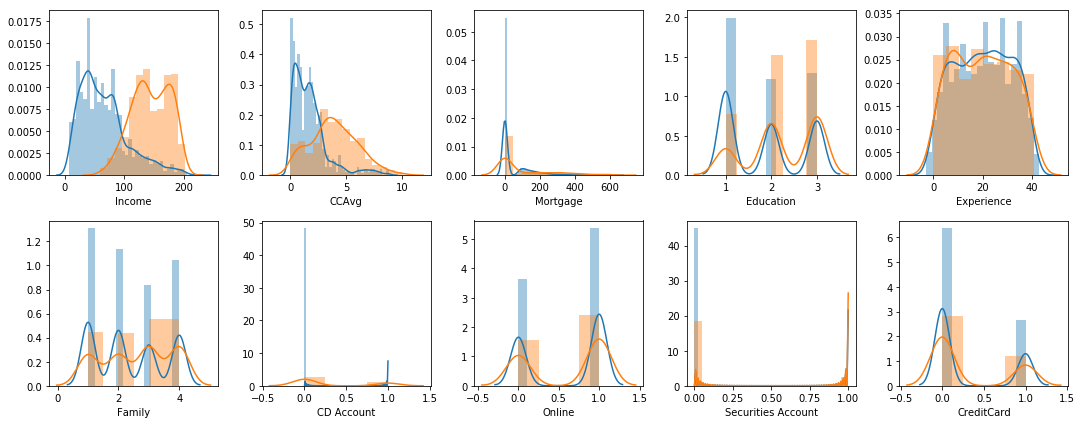

In [23]:
# Check the distribution of Personal loan across other variables.
fig, ax = plt.subplots(2, 5, figsize=(15,6))


fg = sns.FacetGrid(customer_df, hue='Personal Loan', height=3)
fg.map(sns.distplot, 'Income', ax=ax[0,0], label='Income')
fg.map(sns.distplot, 'CCAvg', ax=ax[0,1], label='Credit Card Average')
fg.map(sns.distplot, 'Mortgage', ax=ax[0,2], label='Mortgage')
fg.map(sns.distplot, 'Education', ax=ax[0,3], label='Education')
fg.map(sns.distplot, 'Experience', ax=ax[0,4], label='Exp')
fg.map(sns.distplot, 'Family', ax=ax[1,0], label='Family')
fg.map(sns.distplot, 'CD Account', ax=ax[1,1], label='CD Account')
fg.map(sns.distplot, 'Online', ax=ax[1,2], label='Online')
fg.map(sns.distplot, 'Securities Account', ax=ax[1,3], label='Securities Account')
fg.map(sns.distplot, 'CreditCard', ax=ax[1,4], label='CreditCard')

plt.close(2)
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


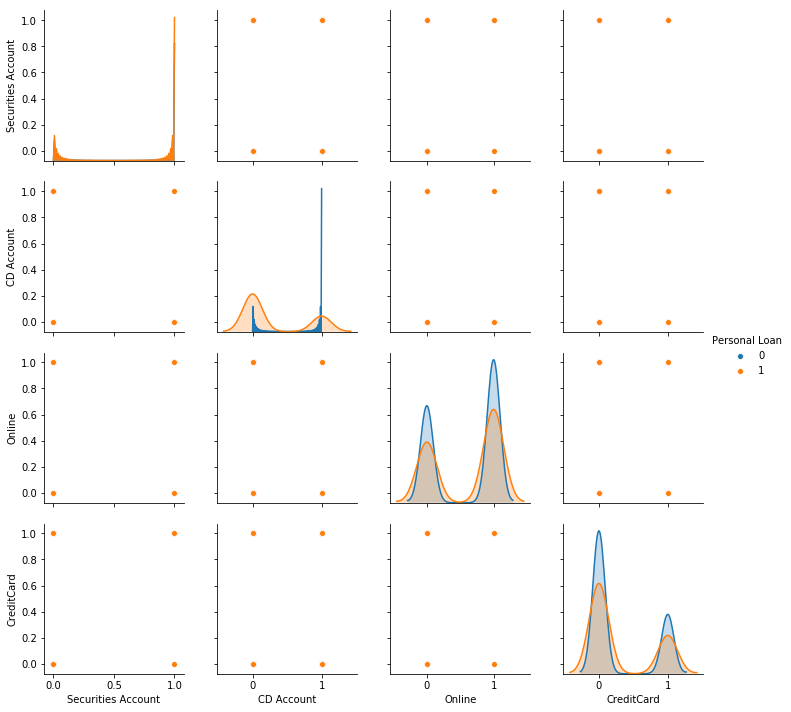

In [25]:
plt.close()
sns.pairplot(customer_df,vars = ['Securities Account', 'CD Account', 'Online', 'CreditCard'],hue='Personal Loan')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


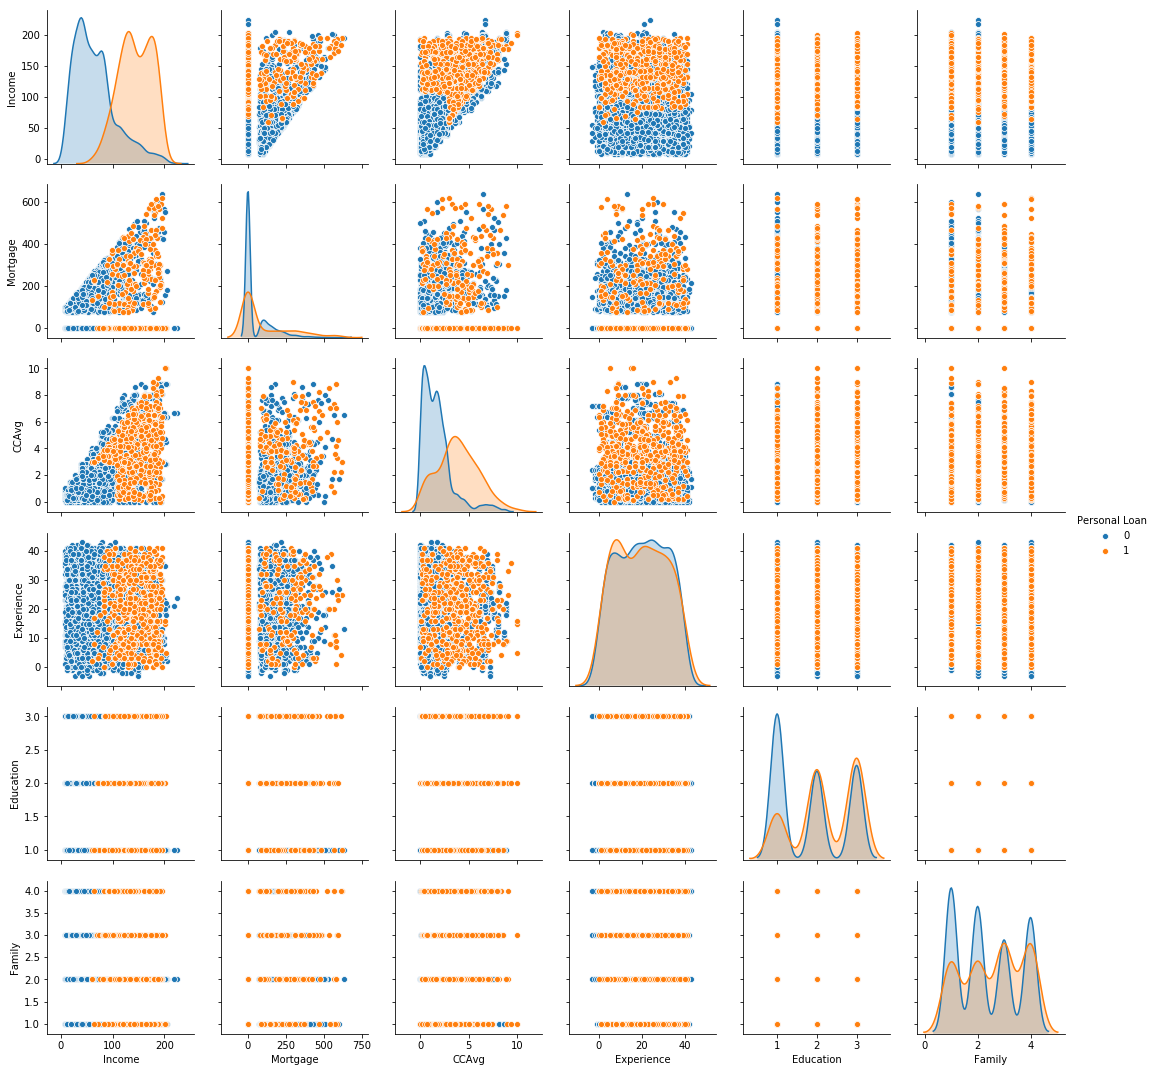

In [26]:
plt.close()
sns.pairplot(customer_df,vars = ['Income', 'Mortgage', 'CCAvg','Experience', 'Education', 'Family'],hue='Personal Loan')

#### Observation: 
1. Persons with higher income appear to have more likelyhood of opting for Personal Loan.
2. Similarly, persons with higher average credit card spending per month/mortgages are more likely to tak personal loan. 
3. More the education, more likelyhood of opting for personal loan. 
4. People who have online account, are more likely to take home loan. 
5. People who do not have creditcard, are more likely to take home loan. 
    

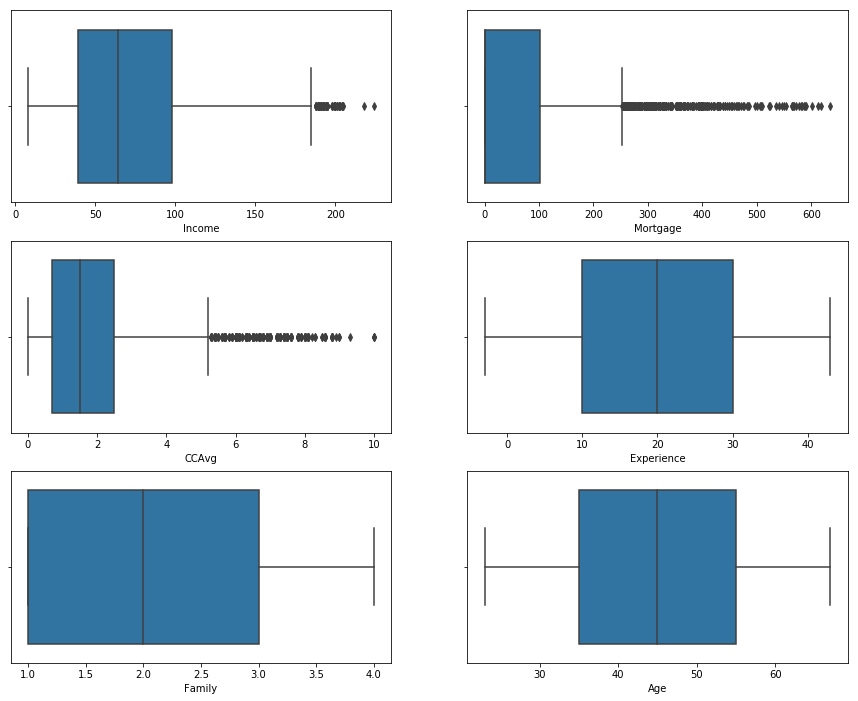

In [56]:
# Plot Boxplot to see if there are outliers
fig, ax = plt.subplots(3,2, figsize=(15,12))

sns.boxplot(customer_df['Income'],ax=ax[0,0])
sns.boxplot(customer_df['Mortgage'],ax=ax[0,1])
sns.boxplot(customer_df['CCAvg'],ax=ax[1,0])
sns.boxplot(customer_df['Experience'],ax=ax[1,1])
sns.boxplot(customer_df['Family'],ax=ax[2,0])
sns.boxplot(customer_df['Age'],ax=ax[2,1])



Observation: There are outliers in three of the columns - Income, Mortgage and CCAvg. Next, I will find these outliers. 

In [27]:
# Check Outliers
def find_outlier(data):
    """ This Function finds the outlier in a data set. 
    lower limit = Q1 - 1.5 * IQR, Upeer limit = Q3 + 1.5 IQR
    Return = The outliers in a List """
    iqr = stats.iqr(data)
    upper_lim = np.percentile(data,75) + (1.5 * iqr)
    lower_lim = np.percentile(data,25) - (1.5 * iqr)
    outlier = []
    for number in data:
        if (number > upper_lim) or (number < lower_lim):
            outlier.append(number)            
    return outlier    

In [32]:
#Find out all otliers
from scipy import stats
income_outlier = find_outlier(customer_df['Income'])
ccavg_outlier = find_outlier(customer_df['CCAvg'])
mortgage_outlier = find_outlier(customer_df['Mortgage'])

print (' There are total {} outliers in Income column'.format(len(income_outlier)))
print (' There are total {} outliers in CCavg column'.format(len(ccavg_outlier)))
print (' There are total {} outliers in mortgage column'.format(len(mortgage_outlier)))

print(' Maximum Value customer_df['Income'].max())
print(customer_df['Mortgage'].max())
print(customer_df['CCAvg'].max())

 There are total 96 outliers in Income column
 There are total 324 outliers in CCavg column
 There are total 291 outliers in mortgage column
224
635
10.0


#### Observation: 
1. There are significant number of outliers, but it does not look like they are due to typo. I have decided NOT TO Drop.
2. I will attempt log transformation to remove as many outliers as possible. 

In [79]:
# Log transformation of columns to remove (reduce) number of outliers. 
customer_df['Income_log']= customer_df['Income'].apply(lambda x: np.log10(x) if x > 0 else 0)
customer_df['Mortgage_log']= customer_df['Mortgage'].apply(lambda x: np.log10(x) if x > 0 else 0)
customer_df['CCAvg_log']= customer_df['CCAvg'].apply(lambda x: np.log10(x) if x > 0 else 0)


In [80]:
customer_df.head(3)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_log,Mortgage_log,CCAvg_log
0,25,1,49,4,1.6,1,0,0,1,0,0,0,1.690196,0.0,0.204120
1,45,19,34,3,1.5,1,0,0,1,0,0,0,1.531479,0.0,0.176091
2,39,15,11,1,1.0,1,0,0,0,0,0,0,1.041393,0.0,0.000000


In [82]:
# Find the ourliers in log transformed variables
income_outlier = find_outlier(customer_df['Income_log'])
ccavg_outlier = find_outlier(customer_df['CCAvg_log'])
mortgage_outlier = find_outlier(customer_df['Mortgage_log'])

print (' There are total {} outliers in Income column'.format(len(income_outlier)))
print (' There are total {} outliers in CCavg column'.format(len(ccavg_outlier)))
print (' There are total {} outliers in mortgage column'.format(len(mortgage_outlier)))


 There are total 49 outliers in Income column
 There are total 183 outliers in CCavg column
 There are total 0 outliers in mortgage column


### Step3: Define Functions to be used in rest of the modules    

In [129]:
# This function prints the side by side confusion matrix for normal model and tuned model 

def calc_confusion_metrics(y_test, X_test, model, tuned_model, threshold, algo):
    
    model_cm=metrics.confusion_matrix(y_test, np.where(model.predict_proba(X_test)[:,1] > threshold, 1, 0), labels=[1, 0])
    tuned_model_cm = metrics.confusion_matrix(y_test, np.where(tuned_model.predict_proba(X_test)[:,1] > threshold, 1, 0), labels=[1, 0])
    
    df_cm = pd.DataFrame(model_cm, index = [i for i in ["False","True"]],
                  columns = [i for i in ["Predict False","Predict True"]])

    df_cm_tuned = pd.DataFrame(tuned_model_cm, index = [i for i in ["False","True"]],
                  columns = [i for i in ["Predict False","Predict True"]])

    fig, ax =plt.subplots(1,2, figsize=(8,3))
        

    sns.heatmap(df_cm, annot=True, fmt = '1',ax = ax[0])
    ax[0].set_title('Confusion Metrics {} - \nNormal Model'.format(algo))

    sns.heatmap(df_cm, annot=True, fmt = '1',ax = ax[1])
    ax[1].set_title('Confusion Metrics {} - \nTuned Model'.format(algo))
    
    plt.tight_layout()
    
    return model_cm, tuned_model_cm

In [135]:
# This function prints the ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
def compute_roc_compare(y_test, X_test, model, tuned_model, threshold = .5, plot=False):
    
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1] > threshold)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1] > threshold)
    
    t_roc_auc = roc_auc_score(y_test, tuned_model.predict_proba(X_test)[:,1] > threshold)
    t_fpr, t_tpr, t_thresholds = roc_curve(y_test, tuned_model.predict_proba(X_test)[:,1] > threshold)
    
    
    fig, ax = plt.subplots(1,2, figsize=(8,4))
    ax[0].plot(fpr, tpr, label='Normal Model (area = {:0.4f}) \n Threshold = {} '.format(roc_auc, threshold))
    ax[0].plot([0, 1], [0, 1],'r--')
    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title('ROC Curve for Normal Model')
    ax[0].legend(loc="lower right")
    
    ax[1].plot(fpr, tpr, label='Normal Model(area = {:0.4f}) \n Threshold = {} '.format(t_roc_auc, threshold))
    ax[1].plot([0, 1], [0, 1],'r--')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title('ROC Curve for Tuned Model')
    ax[1].legend(loc="lower right")
    
    plt.show()
    

### Step4 - Build the Logistic Regression Model 

In [137]:
# Load the dependent and independent variables in different dataframes
X = customer_df[['Age','Experience','Income_log','Family','CCAvg_log','Education','Mortgage_log','Securities Account','CD Account',
               'Online','CreditCard']]
y = customer_df['Personal Loan']

In [138]:
#split the train set and test set. Test Size = 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 5)

In [139]:
#Check the split of data
print("{0:0.2f}% data is in training set".format((len(X_train)/len(customer_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(customer_df.index)) * 100))
print("")
print("Original Personal Loan Taken  : {0} ({1:0.2f}%)".format(len(customer_df.loc[customer_df['Personal Loan'] == 1]), (len(customer_df.loc[customer_df['Personal Loan'] == 1])/len(customer_df.index)) * 100))
print("")

70.00% data is in training set
30.00% data is in test set

Original Personal Loan Taken  : 480 (9.60%)



In [140]:
#Run Logistic Regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Fit the model on train
log_r_model = LogisticRegression(solver="liblinear")
log_r_model.fit(X_train, y_train)

#predict on test
y_predict = log_r_model.predict(X_test)

#Calculate Confusion Metrix
log_regression_normal_cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])


In [141]:
#Caluclate Model Performance Parameters
def cal_model_performance(cm,model):
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    p = TP/(TP+FP) #precision
    r = TP/(TP+FN) #recall
    f1_score = 2 * ((p * r)/(p+r))
    
    model_score = model.score(X_test, y_test)
    print('Accuracy Score = {:0.4f}'.format(model_score))
    
    print('True Positive rate = {:0.4f}'.format(TP/(TP+FN)))
    print('False Positive Rate = {:0.4f}'.format(FP/(FP+TN)))
    print ('Precision = {:0.4f}, recall = {:0.4f} and F1 score = {:0.4f}'.format(p,r,f1_score))


In [142]:
#Print Classification Report
from sklearn.metrics import classification_report
def print_classification_report(y_test,X_test,model, threshold):
    target_names = ['Loan Not Taken', 'Loan Taken']
    print(classification_report(y_test, np.where(model.predict_proba(X_test)[:,1] > threshold, 1, 0), target_names=target_names,digits = 4))

In [143]:
# Logistic Regression with Hyper Parameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [144]:
hyper_model = LogisticRegression()

In [145]:
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = np.logspace(-4, 4, 20)
#Solver 
solver = ['liblinear','saga']
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty,solver=solver)

In [146]:
# Create grid search using 5- fold cross validation
clf = GridSearchCV(hyper_model, hyperparameters, cv=5, verbose=True,n_jobs=-1)

In [147]:
# Fit grid search
hyper_tuned_model = clf.fit(X_train, y_train)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.8min finished


In [148]:
# View best hyperparameters
print('Best Penalty:', hyper_tuned_model.best_estimator_.get_params()['penalty'])
print('Best C:', hyper_tuned_model.best_estimator_.get_params()['C'])
print('Best Solver:', hyper_tuned_model.best_estimator_.get_params()['solver'])

Best Penalty: l1
Best C: 11.288378916846883
Best Solver: liblinear


In [149]:
y_predict_tuned = hyper_tuned_model.predict(X_test)

In [150]:
log_reg_tuned_cm=metrics.confusion_matrix(y_test, y_predict_tuned, labels=[1, 0])

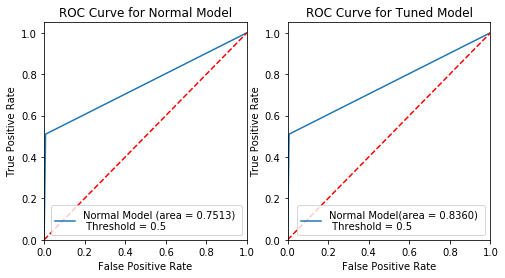

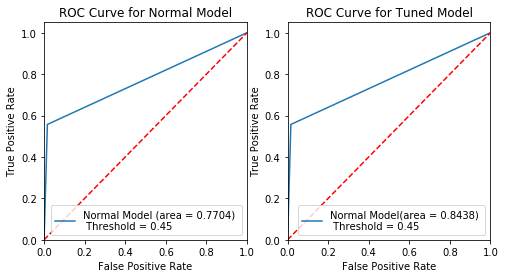

In [152]:
threshold = .5
compute_roc_compare(y_test, X_test, log_r_model, hyper_tuned_model, threshold, True)
threshold = .45
compute_roc_compare(y_test, X_test, log_r_model, hyper_tuned_model, threshold, True)

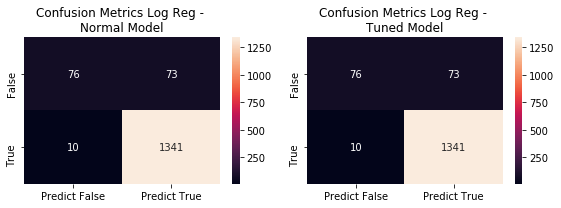

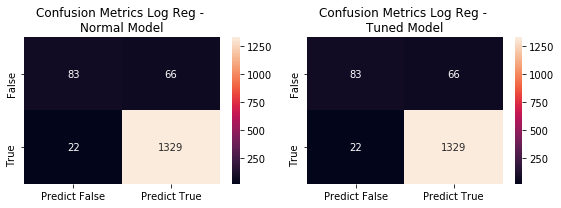

In [153]:
log_reg_cm, tuned_log_reg_cm = calc_confusion_metrics(y_test, X_test, log_r_model, hyper_tuned_model, .5, 'Log Reg' )
log_reg_cm, tuned_log_reg_cm = calc_confusion_metrics(y_test, X_test, log_r_model, hyper_tuned_model, .45, 'Log Reg' )

        

In [58]:
print('Classification Report for NORMAL Logistic regression MODEl')
print('--------------------------------------------------------')
print_classification_report(y_test,X_test,log_r_model, .5)
print_classification_report(y_test,X_test,log_r_model, .6)

Classification Report for NORMAL Logistic regression MODEl
--------------------------------------------------------
                precision    recall  f1-score   support

Loan Not Taken     0.9597    0.9859    0.9726      1351
    Loan Taken     0.8304    0.6242    0.7126       149

   avg / total     0.9468    0.9500    0.9468      1500

                precision    recall  f1-score   support

Loan Not Taken     0.9511    0.9933    0.9718      1351
    Loan Taken     0.8989    0.5369    0.6723       149

   avg / total     0.9459    0.9480    0.9420      1500



In [59]:
print('Classification Report for Tuned Logistic regression MODEl')
print('--------------------------------------------------------')
print_classification_report(y_test,X_test,hyper_tuned_model, .5)
print_classification_report(y_test,X_test,hyper_tuned_model, .6)

Classification Report for Tuned Logistic regression MODEl
--------------------------------------------------------
                precision    recall  f1-score   support

Loan Not Taken     0.9611    0.9867    0.9737      1351
    Loan Taken     0.8407    0.6376    0.7252       149

   avg / total     0.9491    0.9520    0.9490      1500

                precision    recall  f1-score   support

Loan Not Taken     0.9538    0.9933    0.9732      1351
    Loan Taken     0.9032    0.5638    0.6942       149

   avg / total     0.9488    0.9507    0.9455      1500



In [60]:
print('Model Perfromance for NORMAL Logistic regression MODEl')
print('--------------------------------------------------------')
cal_model_performance(log_regression_normal_cm,log_r_model)
print('')

print('Model Perfromance for TUNED with Grid Search MODEl')
print('--------------------------------------------------------')
cal_model_performance(log_reg_tuned_cm,hyper_tuned_model)

Model Perfromance for NORMAL Logistic regression MODEl
--------------------------------------------------------
Accuracy Score = 0.9500
True Positive rate = 0.9859
False Positive Rate = 0.3758
Precision = 0.9597, recall = 0.9859 and F1 score = 0.9726

Model Perfromance for TUNED with Grid Search MODEl
--------------------------------------------------------
Accuracy Score = 0.9520
True Positive rate = 0.9867
False Positive Rate = 0.3624
Precision = 0.9611, recall = 0.9867 and F1 score = 0.9737


### K Nearest Neighbour

In [61]:
#check the orignial dataframe
customer_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [62]:
customer_df['Personal Loan'].value_counts(normalize=True) * 100

0    90.4
1     9.6
Name: Personal Loan, dtype: float64

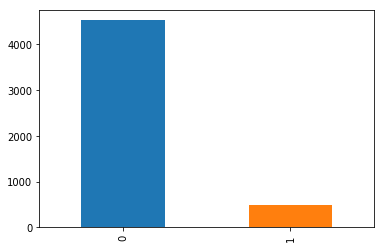

In [63]:
pd.value_counts(customer_df['Personal Loan']).plot(kind="bar")

In [64]:
# Load the dependent and independent variables in different dataframes
X = customer_df[['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account',
               'Online','CreditCard']]
y = customer_df['Personal Loan']

In [65]:
#Split the datasets in training and testing sets with 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 5)

std_columns = X_train.columns

In [66]:
print('Loan in Test Set = {0:0.2f} %'.format((y_test == 1).sum()/len(y_test)*100))
print('Loan in Train Set = {0:0.2f} %'.format((y_train == 1).sum()/len(y_train)*100))

Loan in Test Set = 9.93 %
Loan in Train Set = 9.46 %


In [67]:
std_columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [68]:
#Feature scaling 
std_scale = StandardScaler()
X_train = pd.DataFrame(std_scale.fit_transform(X_train))
X_test = pd.DataFrame(std_scale.fit_transform(X_test))

X_train.columns = std_columns
X_test.columns = std_columns


In [69]:
X_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-1.332229,-1.308366,1.465449,-1.215480,-0.647721,-1.047762,-0.554307,-0.342257,-0.25583,0.815039,-0.650203
1,-1.768420,-1.656931,-1.313676,1.397117,-0.533095,-1.047762,0.390111,-0.342257,-0.25583,-1.226935,1.537981
2,-0.459846,-0.349810,0.900939,-1.215480,0.842419,-1.047762,-0.554307,-0.342257,-0.25583,0.815039,-0.650203
3,0.848729,0.783027,0.553548,-0.344614,-0.303843,-1.047762,2.070182,-0.342257,-0.25583,0.815039,1.537981
4,-0.808799,-1.221224,-1.053133,-1.215480,-0.722228,1.345169,-0.554307,-0.342257,-0.25583,0.815039,-0.650203


In [70]:
X_test.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.044043,-0.027556,1.819060,-1.220075,0.253126,-1.052349,-0.55862,-0.339473,-0.248135,0.838219,1.577457
1,1.265840,1.283234,-1.444908,-1.220075,-1.058468,-1.052349,-0.55862,-0.339473,-0.248135,0.838219,-0.633932
2,0.742213,0.671532,1.840820,-0.347346,-0.830365,-1.052349,3.86416,-0.339473,-0.248135,0.838219,-0.633932
3,-0.130500,-0.114942,-0.291639,0.525383,0.424204,0.125654,-0.55862,-0.339473,-0.248135,-1.193006,-0.633932
4,0.654941,0.671532,-0.944433,1.398112,-1.058468,1.303656,-0.55862,-0.339473,-0.248135,0.838219,-0.633932


In [71]:
# Import Necessary libriries for KNN model and it's evaluation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [72]:


def knn_model(X_train,y_train, n):
    # instantiate learning model (k = n_nighbours)
    knn = KNeighborsClassifier(n_neighbors = n )
    
    # fitting the model
    knn.fit(X_train, y_train)
    
    # predict the response
    y_pred = knn.predict(X_test)
    
    print('Accuracy Score with k = {} is {:0.6f}'.format(n ,accuracy_score(y_test, y_pred)))
    
    return knn
    
   

In [73]:
# Run KNN model with K = 1, 3, 5, 9, 15
knn_model(X_train,y_train,1)
knn_model(X_train,y_train,3)
knn_model(X_train,y_train,5)
knn_model(X_train,y_train,9)
knn_model(X_train,y_train,15)


Accuracy Score with k = 1 is 0.958000
Accuracy Score with k = 3 is 0.958000
Accuracy Score with k = 5 is 0.954000
Accuracy Score with k = 9 is 0.947333
Accuracy Score with k = 15 is 0.944000


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [74]:
#Run with k =3
knn_model = knn_model(X_train,y_train,3)
y_predict = knn_model.predict(X_test)

Accuracy Score with k = 3 is 0.958000


In [75]:
knn_cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

In [76]:
#Find the optimum value of K using gridsearch
grid_param = {'n_neighbors': [3,5,11,15,19],
             'weights' : ['uniform','distance'],
             'metric' : ['euclidean','manhattan']}
             
grid_search = GridSearchCV(KNeighborsClassifier(),grid_param,verbose=1,cv=5,n_jobs=-1)

grid_search_knn_model = grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   33.4s finished


In [77]:
# View best hyperparameters
print('Best neighbor:', grid_search_knn_model.best_params_)


Best neighbor: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [78]:
#Rerun the model using optimum parameters
knn_tuned = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', metric = 'euclidean' )
    
    # fitting the model
knn_tuned.fit(X_train, y_train)
    
    # predict the response
y_predict = knn_tuned.predict(X_test)
    
print('Accuracy Score for tuned model with k = {} is {:0.6f}'.format(3 ,accuracy_score(y_test, y_predict)))
    

Accuracy Score for tuned model with k = 3 is 0.958667


In [79]:
y_predict = knn_tuned.predict(X_test)
knn_tuned_cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

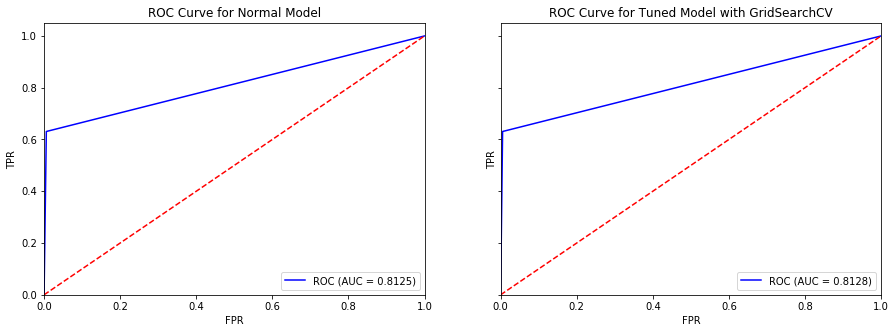

In [90]:
threshold = .5
compute_roc_compare(y_test, X_test, knn_model, knn_tuned, threshold, True)

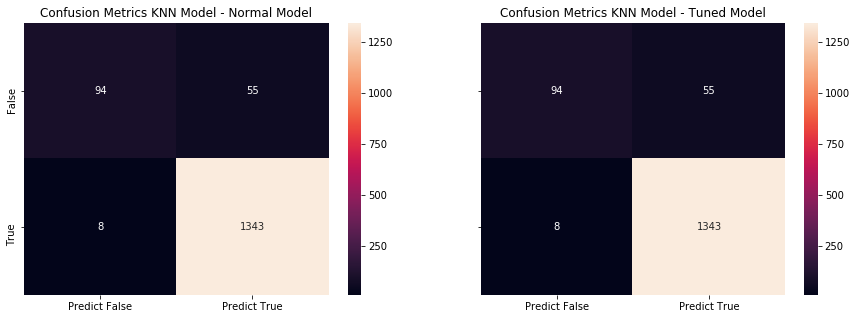

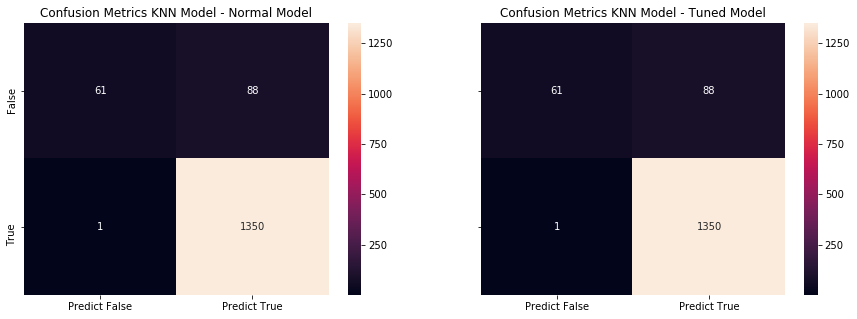

In [87]:
print_confusion_metrics(y_test, X_test, knn_model, knn_tuned, .5, 'KNN Model' )
print_confusion_metrics(y_test, X_test, knn_model, knn_tuned, .8, 'KNN Model' )

In [86]:
print('Classification Report for NORMAL KNN regression MODEl')
print('--------------------------------------------------------')
print_classification_report(y_test,X_test,knn_model, .5)
print_classification_report(y_test,X_test,knn_model, .6)

Classification Report for NORMAL KNN regression MODEl
--------------------------------------------------------
                precision    recall  f1-score   support

Loan Not Taken     0.9607    0.9941    0.9771      1351
    Loan Taken     0.9216    0.6309    0.7490       149

   avg / total     0.9568    0.9580    0.9544      1500

                precision    recall  f1-score   support

Loan Not Taken     0.9607    0.9941    0.9771      1351
    Loan Taken     0.9216    0.6309    0.7490       149

   avg / total     0.9568    0.9580    0.9544      1500



In [236]:
print('Classification Report for NORMAL KNN regression MODEl')
print('--------------------------------------------------------')
print_classification_report(y_test,X_test,knn_tuned)

Classification Report for NORMAL KNN regression MODEl
--------------------------------------------------------
                precision    recall  f1-score   support

Loan Not Taken     0.9607    0.9948    0.9775      1351
    Loan Taken     0.9307    0.6309    0.7520       149

   avg / total     0.9577    0.9587    0.9551      1500



In [237]:
print('Model Perfromance for NORMAL KNN MODEl')
print('--------------------------------------------------------')
cal_model_performance(knn_cm,knn_model)
print('')

print('Model Perfromance for TUNED with Grid Search KNN MODEl')
print('--------------------------------------------------------')
cal_model_performance(knn_tuned_cm,knn_tuned)

Model Perfromance for NORMAL KNN MODEl
--------------------------------------------------------
Accuracy Score = 0.9580
True Positive rate = 0.9941
False Positive Rate = 0.3691
Precision = 0.9607, recall = 0.9941 and F1 score = 0.9771

Model Perfromance for TUNED with Grid Search KNN MODEl
--------------------------------------------------------
Accuracy Score = 0.9587
True Positive rate = 0.9948
False Positive Rate = 0.3691
Precision = 0.9607, recall = 0.9948 and F1 score = 0.9775


### Naive Bayes

In [238]:
#Original Dataframe
customer_df.head()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [239]:
# Load the dependent and independent variables in different dataframes
X = customer_df[['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account',
               'Online','CreditCard']]
y = customer_df['Personal Loan']

In [240]:
#Split the datasets in training and testing sets with 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 5)

In [241]:
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

In [242]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB(priors=None)

In [243]:
y_predict = nb_model.predict(X_test)

In [244]:
accuracy_score(y_test, y_predict, normalize = True)

0.8746666666666667

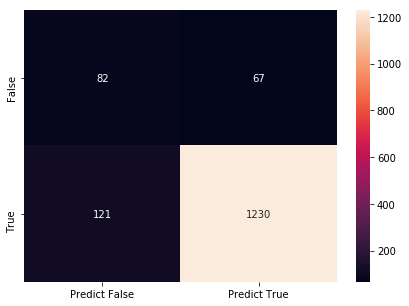

In [245]:
nb_cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(nb_cm, index = [i for i in ["False","True"]],
                  columns = [i for i in ["Predict False","Predict True"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = '1')

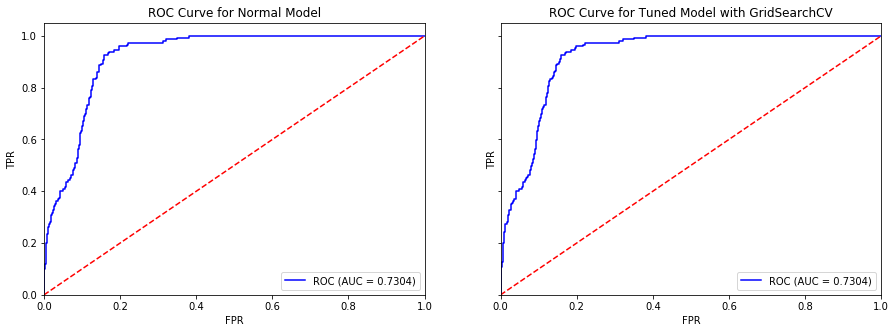

In [246]:
compute_roc_compare(y_test, X_test, nb_model, nb_model, threshold, True)

In [247]:
print('Classification Report for NORMAL Naive Bayes MODEl')
print('--------------------------------------------------------')
print_classification_report(y_test,X_test,nb_model)

Classification Report for NORMAL Naive Bayes MODEl
--------------------------------------------------------
                precision    recall  f1-score   support

Loan Not Taken     0.9483    0.9104    0.9290      1351
    Loan Taken     0.4039    0.5503    0.4659       149

   avg / total     0.8943    0.8747    0.8830      1500



In [249]:
print('Model Perfromance for NORMAL Navie Bayes MODEl')
print('--------------------------------------------------------')
cal_model_performance(nb_cm,nb_model)
print('')

Model Perfromance for NORMAL Navie Bayes MODEl
--------------------------------------------------------
Accuracy Score = 0.8747
True Positive rate = 0.9104
False Positive Rate = 0.4497
Precision = 0.9483, recall = 0.9104 and F1 score = 0.9290



In [287]:
#95% Interval

ac_score = accuracy_score(y_test,y_predict)

print ('We can say with 95% confidence interval that accuracy is between {:.4f} and {:.4f} '.format(
        ac_score + 1.96 * np.sqrt(ac_score * (1-ac_score)/len(y_test)), 
        ac_score - 1.96 * np.sqrt(ac_score * (1-ac_score)/len(y_test))
        ))


We can say with 95% confidence interval that accuracy is between 0.8914 and 0.8579 
